---

# Tutorial Notebook: Data Profiling with Python
Hello everyone, welcome to the "Python pandas" assignment. This tutorial notebook, the first one of the serial notebooks, will focus on [data profiling](https://en.wikipedia.org/wiki/Data_profiling). You will learn the following contents:
* Section 1: Data Overview and General Statistics
* Section 2: Outlier Detection
* Section 3: Missing Values
* Section 4: Correlation
* Section 5: Other Data Profiling Tools

# Package Installation

In [2]:
# Execute once if you want to run this on your local computer. 
# Some of these libraries are overlapped with the 2nd tutorial. Do not execute these on the prepared coursera platform.
#!pip install pandas numpy matplotlib seaborn heatmapz -t ./lib
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -t ./lib
#!pip install sweetviz -t ./lib

# Preparation

In [1]:
import sys
sys.path.insert(0, "./lib")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from heatmap import corrplot

ModuleNotFoundError: No module named 'heatmap'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Load Dataset

This notebook uses this **airbnb dataset** to illustrate how to do data profiling with python.

In [3]:
# Using pandas package to read CSV and store the values into a data frame
airbnb_data = pd.read_csv('Airbnblistings_dirty_noSpeChar.csv')

# Section 1: Data Overview and General Statistics

**Section Goal:** In this section, you will learn how to use describe(), info(), dtypes, and visualize the data/value distribution of a certain column

In [4]:
# DataFrame attribute returns the first n rows, default n value = 5.
airbnb_data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,(Hyde Park - Walk to UChicago/Theological Semi...,2613,Rebecca,NaN,hyde park,41.788865,-87.586709,Private room,50,2,137,11/12/18,2.92,1,163
1,6715,(Lincoln Park Oasis - Unit 2 ONLY),15365,Reem,NaN,OHARE,41.929262,-87.660091,Entire home/apt,255,4,93,8/12/18,0.81,2,303
2,7126,(Tiny Studio Apartment 94 Walk Score),17928,Sarah,NaN,West Town,41.902895,-87.681822,Entire home/apt,80,2,321,10/29/18,2.81,1,362


In [5]:
# DataFrame attribute returns a Series with the data type of each column. 
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# Print the summary of a DataFrame, including column names, the number of non-null values, and data type.
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7594 entries, 0 to 7593
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7594 non-null   int64  
 1   name                            7594 non-null   object 
 2   host_id                         7594 non-null   int64  
 3   host_name                       7591 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   7594 non-null   object 
 6   latitude                        7594 non-null   float64
 7   longitude                       7594 non-null   float64
 8   room_type                       7594 non-null   object 
 9   price                           7594 non-null   int64  
 10  minimum_nights                  7594 non-null   int64  
 11  number_of_reviews               7594 non-null   int64  
 12  last_review                     66

In [7]:
# Generate descriptive statistics. 
# Descriptive statistics include those that summarize the central tendency, 
# dispersion, and shape of a dataset's distribution, 
# and excluding NaN values.
airbnb_data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7.594000e+03,7.594000e+03,0.0,7594.000000,7594.000000,7594.000000,7594.000000,7594.000000,6698.000000,7594.000000,7594.000000
mean,1.927845e+07,6.662405e+07,NaN,41.903008,-87.665745,147.740585,4.355149,35.443771,2.613099,9.295760,169.729128
std,8.045967e+06,6.347290e+07,NaN,0.057096,0.039722,258.261766,17.799005,51.791031,2.185901,25.513872,134.173640
min,2.384000e+03,2.140000e+03,NaN,41.651558,-87.843687,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,1.408539e+07,1.260876e+07,NaN,41.877135,-87.687371,60.000000,1.000000,4.000000,0.830000,1.000000,49.000000
50%,2.101118e+07,4.494278e+07,NaN,41.907135,-87.662312,99.000000,2.000000,16.000000,2.100000,2.000000,151.000000
75%,2.600125e+07,1.081162e+08,NaN,41.941543,-87.639197,165.000000,2.000000,45.000000,3.890000,5.000000,327.000000
max,3.004837e+07,2.257737e+08,NaN,42.022365,-87.537898,10000.000000,365.000000,525.000000,27.020000,143.000000,365.000000


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='count'>

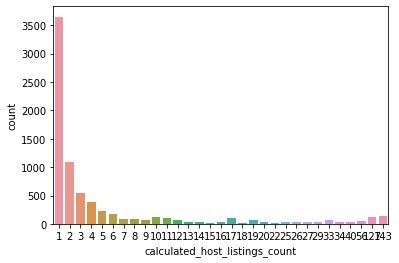

In [8]:
# Of all hosts of the Airbnb listings in Chicago, how many houses do they rent?
# order by column calculated_host_listings_count
sns.countplot(x='calculated_host_listings_count', data=airbnb_data)

#  Section 2: Outlier Detection

**Section Goal:** In this section, you will learn what is an outlier, why should we care about it, and most importantly, how to detect it, which will prepare you well for data cleaning

## 2.1 What is outlier

![Outlier](img/outlier.jpeg)

An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. It is also called anomalies.<br>

Outliers can have many causes, such as:
- Measurement of input error.
- Data corruption.
- True outlier observation. 

## 2.2 Why should we care?

![Outlier](img/example.png)

As you can see, the data set with outliers have a significantly different mean and standard deviation. In the first scenario, we will say that average is 5.45. But with the outlier, the average soars to 30. This would change the estimate completely.

## 2.3 How to detect outliers?

There are various ways to detect outliers. We raise two methods with examples: by Interquartile Range (IQR) and Standard Deviation (STD).

### 2.3.1 IQR

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.

In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.

The difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers, in this case, are defined as the observations below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. The box plot below visually represents it.

![Interquartile Range](img/IQR.png)

In [9]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

For example, Let's check the outlier for the variable "price" in our Airbnb dataset.

In [10]:
out_iqr(airbnb_data,'price')

The IQR is 105.0
The lower bound value is -97.5
The upper bound value is 322.5
Total number of outliers are 492


### visualization

Let's visualize the data and the outliers. (Where're the outliers in the boxplot figure?)

./lib/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


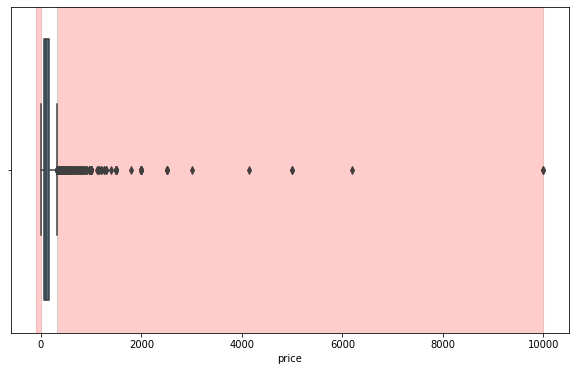

In [11]:
plt.figure(figsize = (10,6))
sns.boxplot(airbnb_data.price)
plt.axvspan(xmin = lower,xmax= airbnb_data.price.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= airbnb_data.price.max(),alpha=0.2, color='red')

The figure will look better if we change the x-axis into a log scale. Let's use the code below.

./lib/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


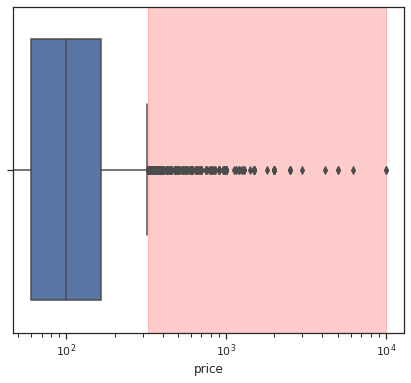

In [12]:
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")
sns.boxplot(airbnb_data.price)

plt.axvspan(xmin = lower,xmax= airbnb_data.price.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= airbnb_data.price.max(),alpha=0.2, color='red')

### 2.3.2 STD

Standard deviation is a metric of variance, i.e., how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal, about 68% of the data values lie within one standard deviation of the mean, about 95% are within two standard deviations, and about 99.7% lie within three standard deviations.

![Standard Deviation](img/std.png)

In [13]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [14]:
out_std(airbnb_data,'price')

The lower bound value is -627.0447138034564
The upper bound value is 922.5258831476755
Total number of outliers are 64


## 2.4 How to deal with oulier?

- clean the dataset by cutting off the outliers.
- analyze the outliers separately.

examples:

In [15]:
df_new = airbnb_data[(airbnb_data['price'] < upper) & (airbnb_data['price'] > lower)]

In [16]:
airbnb_data.price.describe()

count     7594.000000
mean       147.740585
std        258.261766
min          0.000000
25%         60.000000
50%         99.000000
75%        165.000000
max      10000.000000
Name: price, dtype: float64

In [17]:
df_new.price.describe()

count    7530.000000
mean      132.424834
std       113.426877
min         0.000000
25%        60.000000
50%        99.000000
75%       160.000000
max       900.000000
Name: price, dtype: float64

#  Section 3: Missing Value Detection

**Section Goal:** In this section, you will learn how to detect missing values (the difference between NA and NULL), different types of missing values, and simple methods to deal with missing values.

## 3.1 Missing Values Detection

In [18]:
# Return the columns with missing values
columns_with_mv = airbnb_data.columns[airbnb_data.isnull().any()]

In [20]:
print(columns_with_mv)

Index(['host_name', 'neighbourhood_group', 'last_review', 'reviews_per_month'], dtype='object')


In [19]:
# Output the number of missing values of each column
# df[columns_with_mv].isna().sum() also works
airbnb_data[columns_with_mv].isnull().sum()

host_name                 3
neighbourhood_group    7594
last_review             895
reviews_per_month       896
dtype: int64

Note: in Pandas (and Numpy), the nan's don't compare equal.

In [21]:
# cannot compare nan's equal
np.nan == np.nan

False

In [22]:
# The host_name column contains 3 missing values
np.sum(airbnb_data['host_name'].isnull())

3

In [23]:
# however, this method returns no missing value
np.sum(airbnb_data['host_name'] == np.nan)

0

## 3.2 Drop columns in which all values are missing

Details of pandas.DataFrame.dropna(): [reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna)

In [24]:
df_drop_columns = airbnb_data.dropna(axis='columns', how='all') 
# how='all': if all values are NA, drop that columns.

In [25]:
df_drop_columns.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2384,(Hyde Park - Walk to UChicago/Theological Semi...,2613,Rebecca,hyde park,41.788865,-87.586709,Private room,50,2,137,11/12/18,2.92,1,163
1,6715,(Lincoln Park Oasis - Unit 2 ONLY),15365,Reem,OHARE,41.929262,-87.660091,Entire home/apt,255,4,93,8/12/18,0.81,2,303
2,7126,(Tiny Studio Apartment 94 Walk Score),17928,Sarah,West Town,41.902895,-87.681822,Entire home/apt,80,2,321,10/29/18,2.81,1,362
3,9811,(Barbara's Hideaway - Old Town),33004,At Home Inn,Lincoln Park,41.917689,-87.637879,Entire home/apt,150,3,33,10/14/18,0.59,9,350
4,10610,(3 Comforts of Cooperative Living),2140,Lois And Ed,hyde park,41.797085,-87.591949,Private room,35,2,31,7/29/18,0.63,5,179


## 3.3 Different data types of missing values

### 3.3.1 NaN is a float by default in pandas

For other types of columns, pandas will promote dtype for preserving NAs.
- floating --> no change
- object --> no change
- integer -->  float64
- boolean --> object

In [26]:
df_drop_columns['reviews_per_month']

0       2.92
1       0.81
2       2.81
3       0.59
4       0.63
        ... 
7589     NaN
7590     NaN
7591     NaN
7592     NaN
7593     NaN
Name: reviews_per_month, Length: 7594, dtype: float64

### 3.3.2 Datetimes with missing values

In [27]:
df_drop_columns['last_review']

0       11/12/18
1        8/12/18
2       10/29/18
3       10/14/18
4        7/29/18
          ...   
7589         NaN
7590         NaN
7591         NaN
7592         NaN
7593         NaN
Name: last_review, Length: 7594, dtype: object

In [28]:
# Each non-missing value stored as a string in column 'last review'
type(df_drop_columns['last_review'][0])

str

In [29]:
# Convert last_review to datettime64[ns] type, and store it to a new column named as 'last_review_timestamp'
df_drop_columns['last_review_timestamp'] = pd.to_datetime(df_drop_columns['last_review'], format='%m/%d/%y')

In [30]:
# NaT represents missing values for datetime64[ns] types.
df_drop_columns['last_review_timestamp']

0      2018-11-12
1      2018-08-12
2      2018-10-29
3      2018-10-14
4      2018-07-29
          ...    
7589          NaT
7590          NaT
7591          NaT
7592          NaT
7593          NaT
Name: last_review_timestamp, Length: 7594, dtype: datetime64[ns]

## 3.4 Fill NA/NaN with specific values

### 3.4.1 pandas.DataFrame.fillna()

In [31]:
df_drop_columns['reviews_per_month']

0       2.92
1       0.81
2       2.81
3       0.59
4       0.63
        ... 
7589     NaN
7590     NaN
7591     NaN
7592     NaN
7593     NaN
Name: reviews_per_month, Length: 7594, dtype: float64

In [32]:
np.sum(df_drop_columns['reviews_per_month'] <= 0)

0

In [33]:
df_drop_columns['reviews_per_month'].fillna(value=0)

0       2.92
1       0.81
2       2.81
3       0.59
4       0.63
        ... 
7589    0.00
7590    0.00
7591    0.00
7592    0.00
7593    0.00
Name: reviews_per_month, Length: 7594, dtype: float64

### 3.4.2 pandas.DataFrame.interpolate()

In [34]:
df_drop_columns['reviews_per_month'].interpolate(method='linear')

0       2.92
1       0.81
2       2.81
3       0.59
4       0.63
        ... 
7589    1.00
7590    1.00
7591    1.00
7592    1.00
7593    1.00
Name: reviews_per_month, Length: 7594, dtype: float64

# Section 4: Correlation

If we have a data set with many columns, we can quickly check correlations among columns using the [heatmapz](https://pypi.org/project/heatmapz/). We can create a correlation matrix plot using all numerical columns from our dataset. In the matrix below, green means positive correlation, and red means negative correlation. In addition to color, the size of each square visualizes the magnitude of the correlation it represents. Also, we can see that the stronger the color, the larger the correlation magnitude.

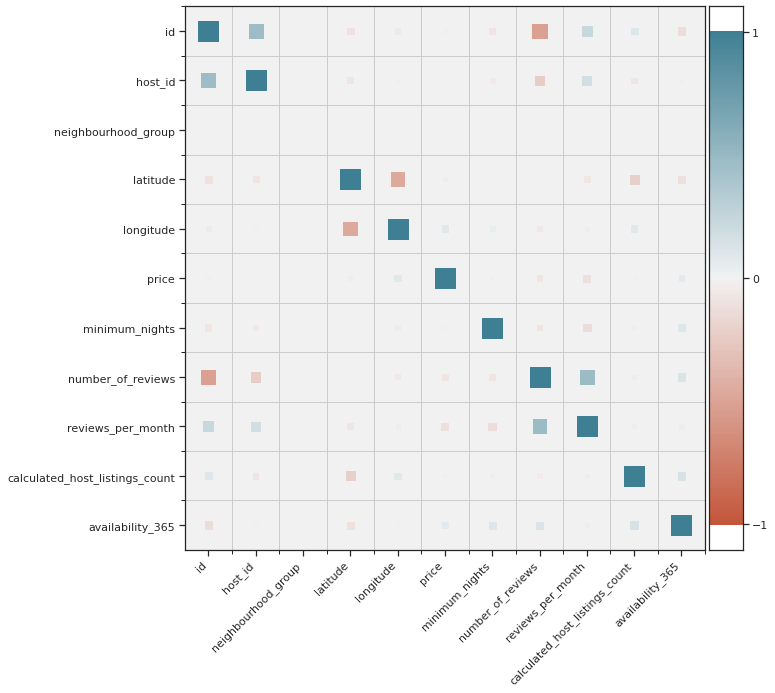

In [35]:
plt.figure(figsize=(10, 10))
corrplot(airbnb_data.corr(), size_scale=400);

# Section 5: Other Data Profiling Tools

## 5.1 Pandas Profiling

### 5.1.1 Import pandas_profiling

In [36]:
import pandas_profiling

### 5.1.2 pandas_profiling Report

In [37]:
# due to limitation of current environment, we will use nbviewer to help you explore this part
# airbnb_data.profile_report() # usually you can run this line of code on your local computer

Please use the following link to access this part [nbviewer](https://nbviewer.jupyter.org/gist/yilinxia/6a87ec318e6cade2f0366defb432c138)

## 5.2 - sweetviz

### 5.2.1 Import sweetviz

In [38]:
import sweetviz as sv

### 5.2.2 Use sweetviz to generate report

In [39]:
advert_report = sv.analyze(airbnb_data)

                                             |          | [  0%]   00:00 -> (? left)

### 5.2.3 Read report
After running the code, you should see the report. The report includes:

* Overview of the dataset is on the very top, where you can find the number of rows, duplicates, a number of numerical attributes, and a number of the categorical attribute.

* You can easily find each data column shown as a card with a Percentage of missing values and Distinct Values. For numerical data, you will see the distribution histogram. While for categorical values, you will see the frequency of each distinct value.


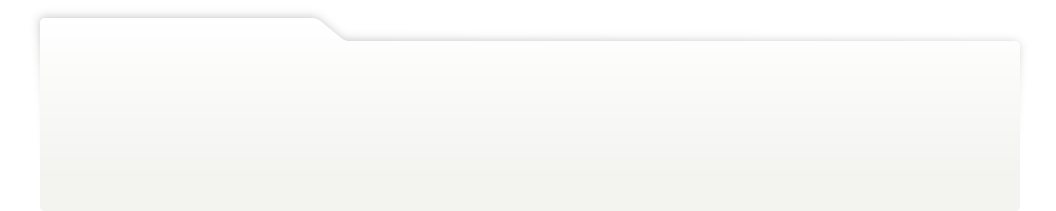
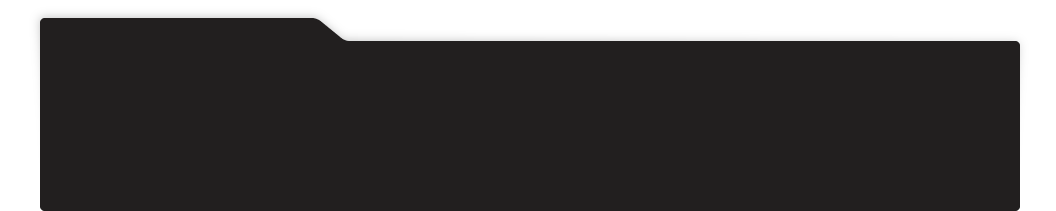
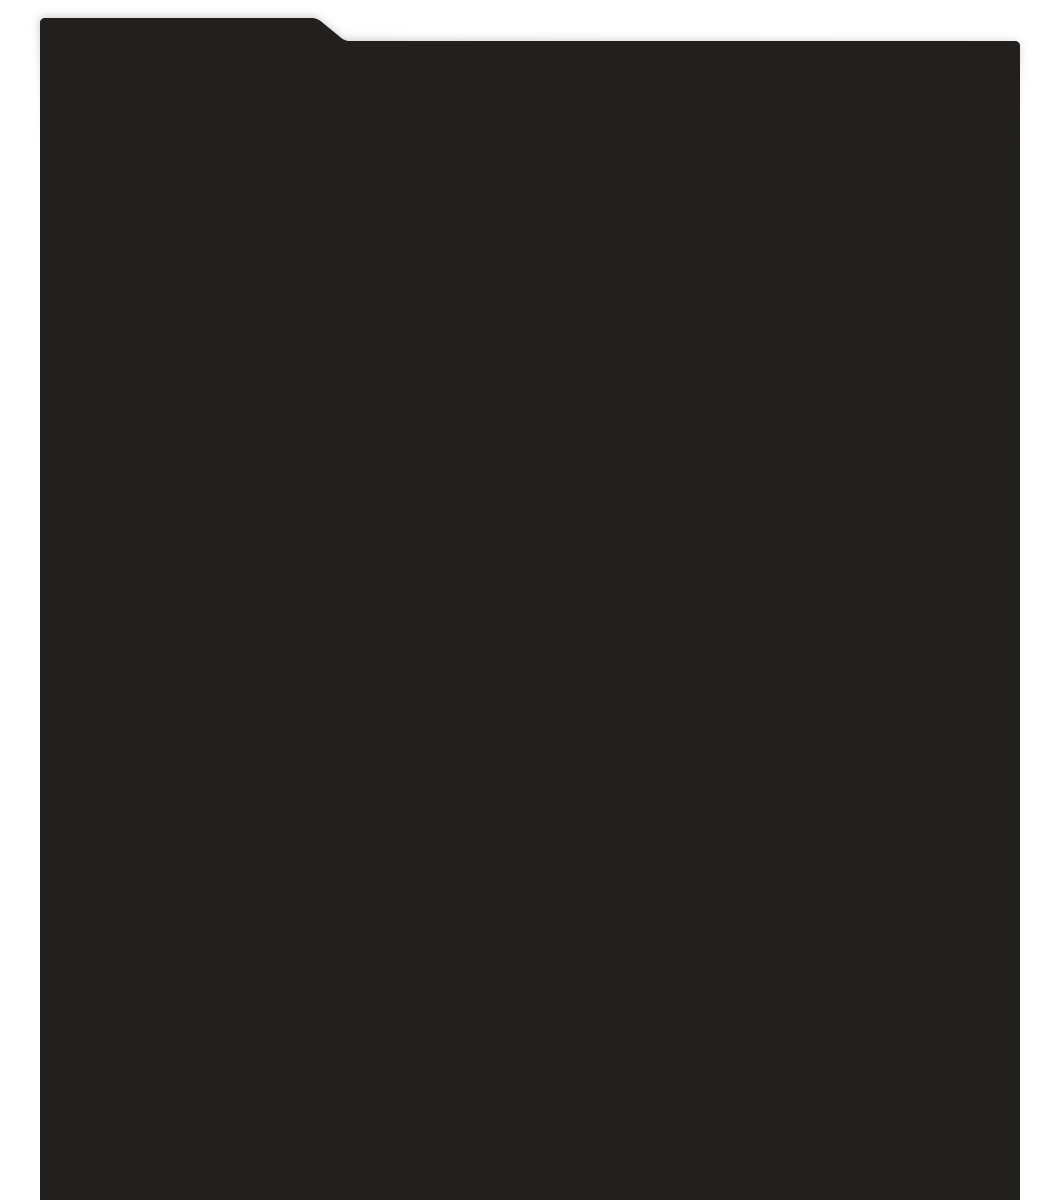
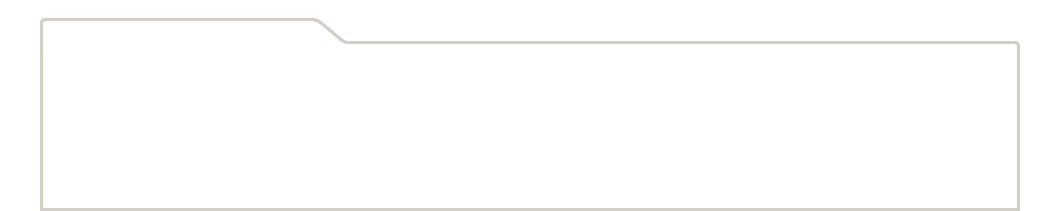
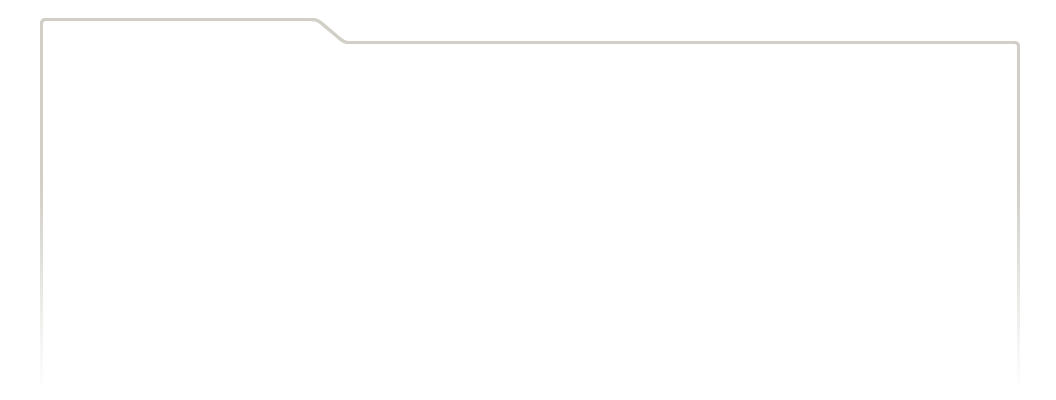
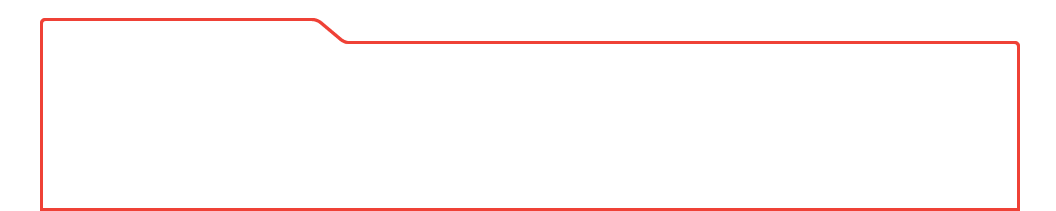
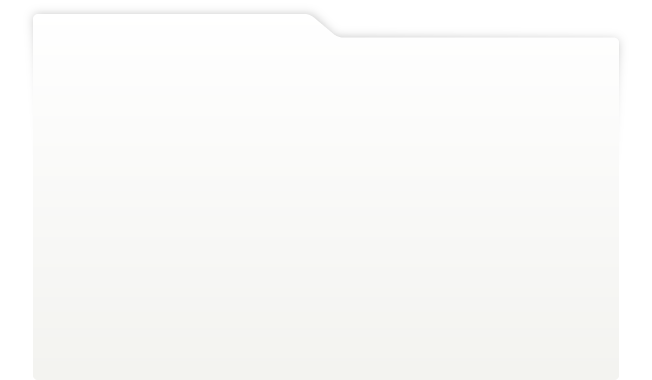
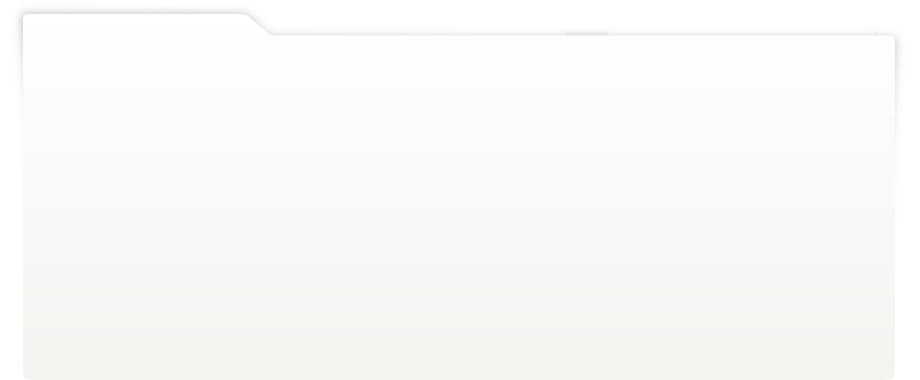
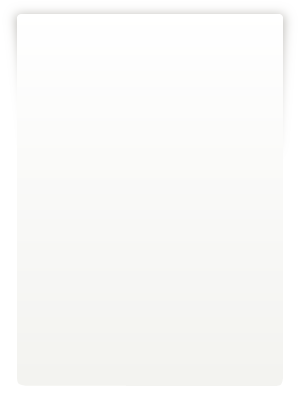
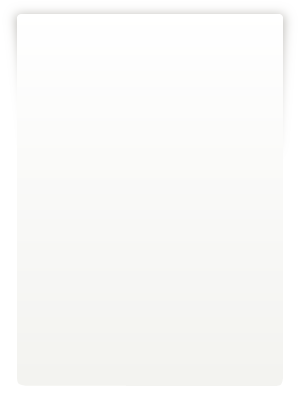
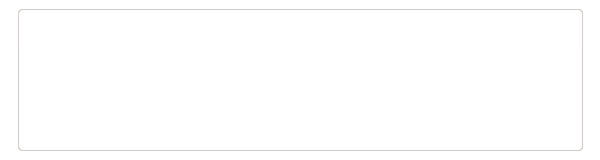
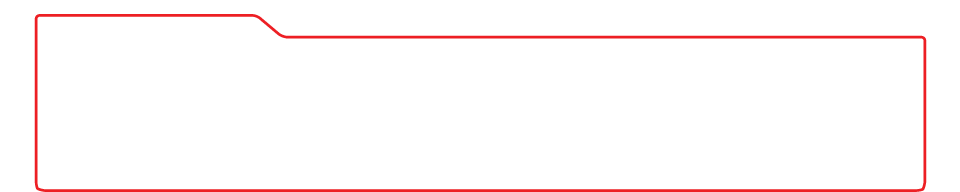
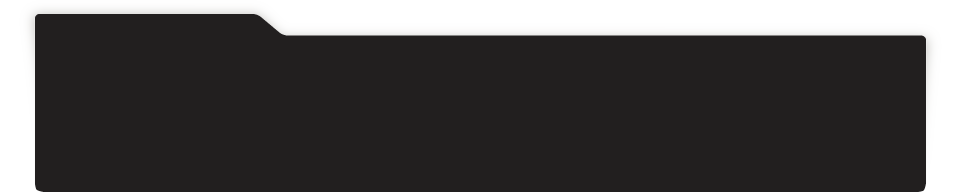
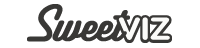
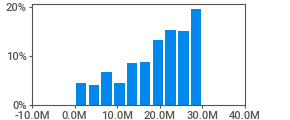
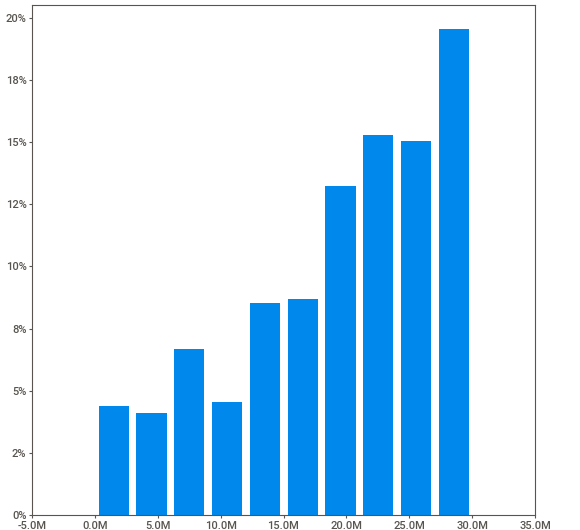
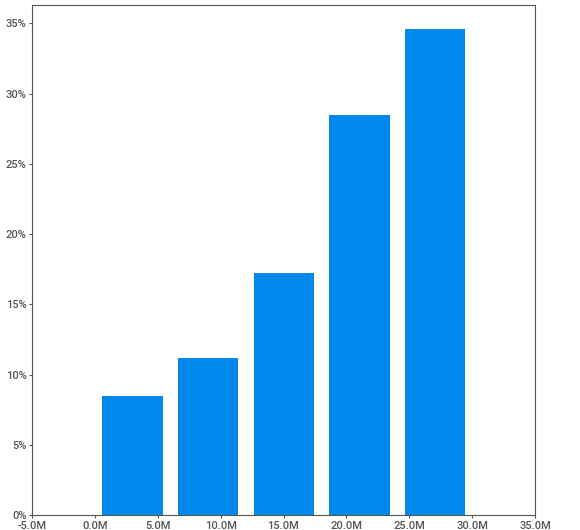
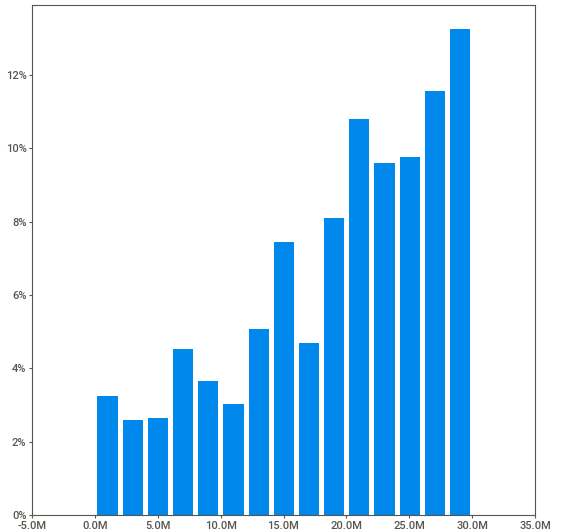
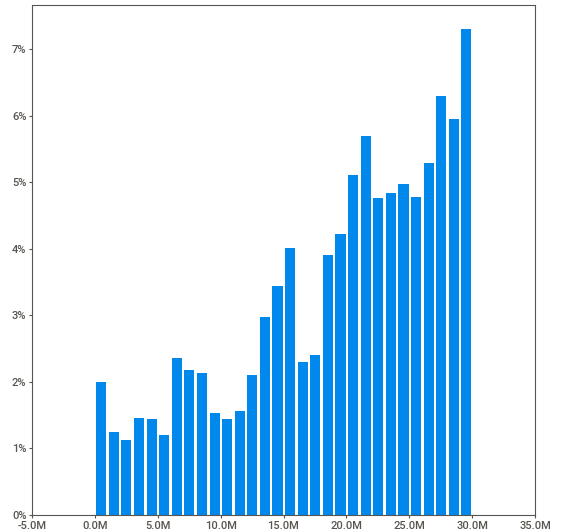
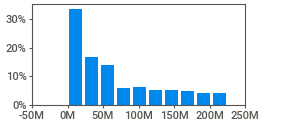
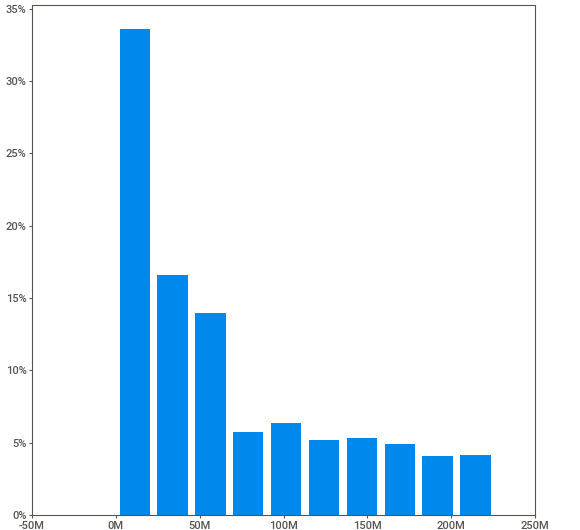
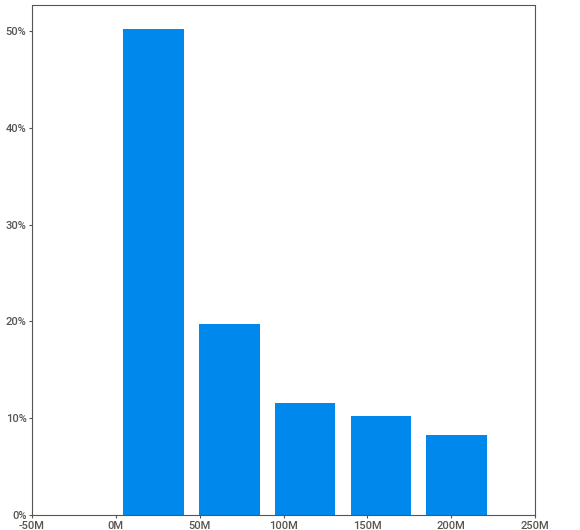
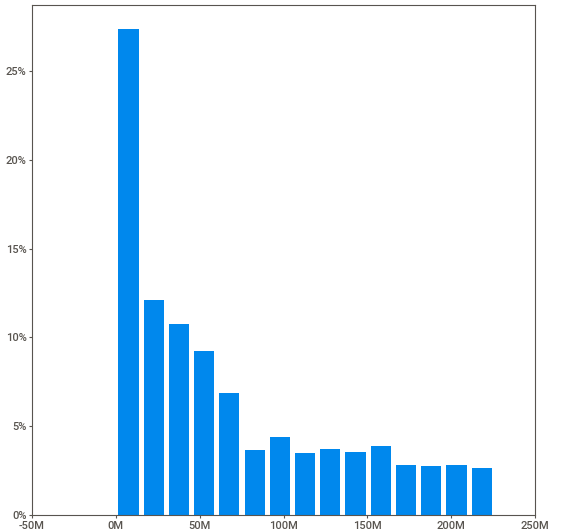
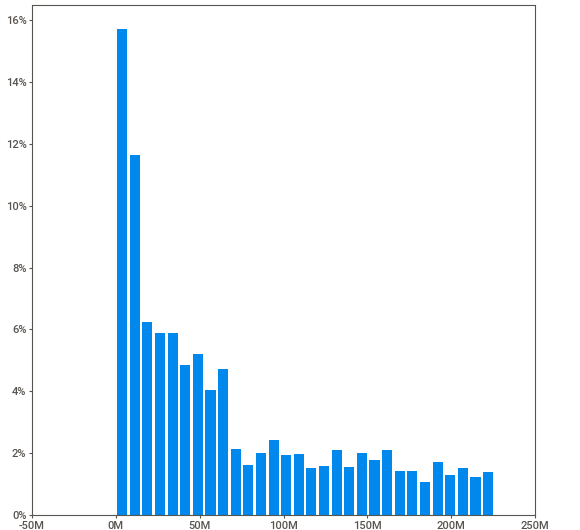
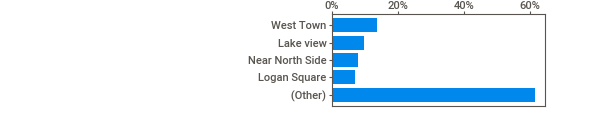
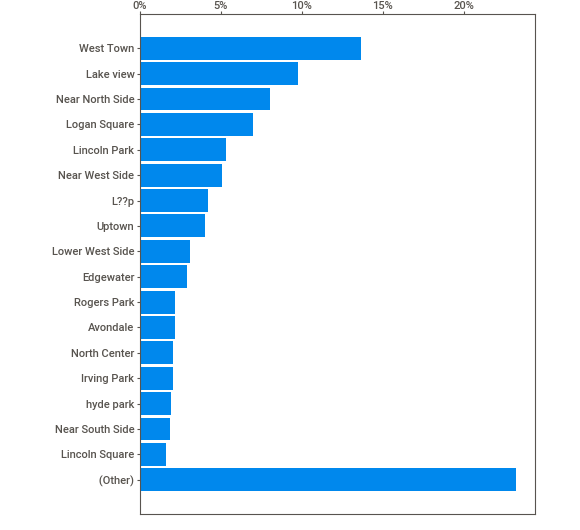
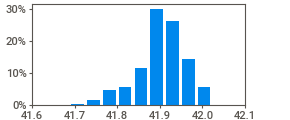
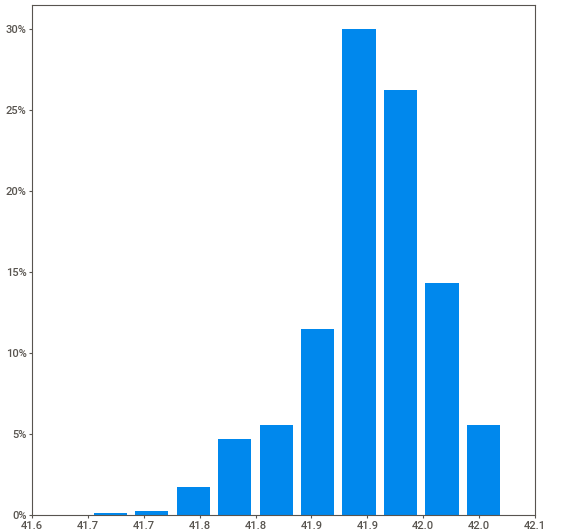
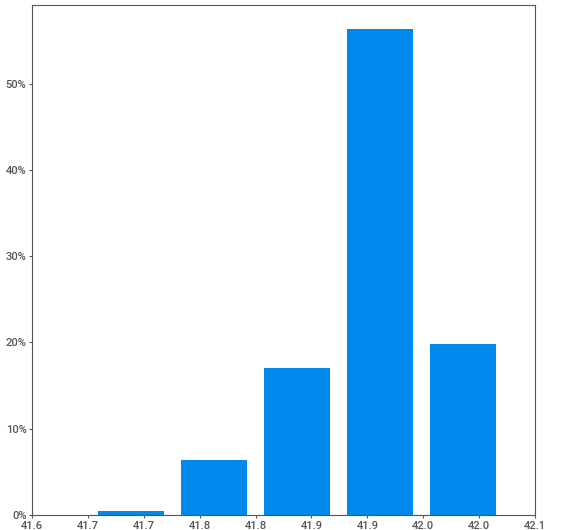
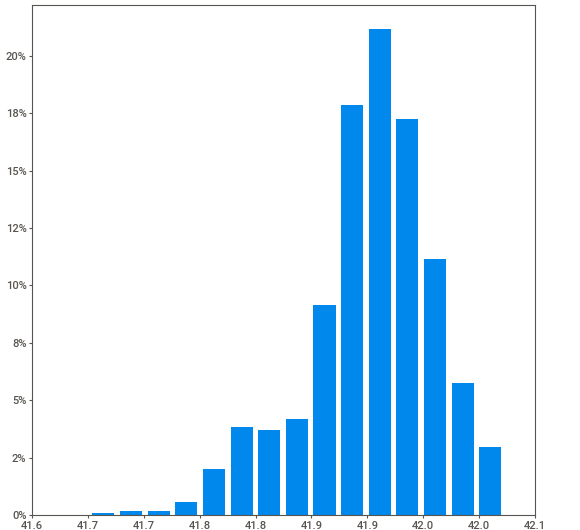
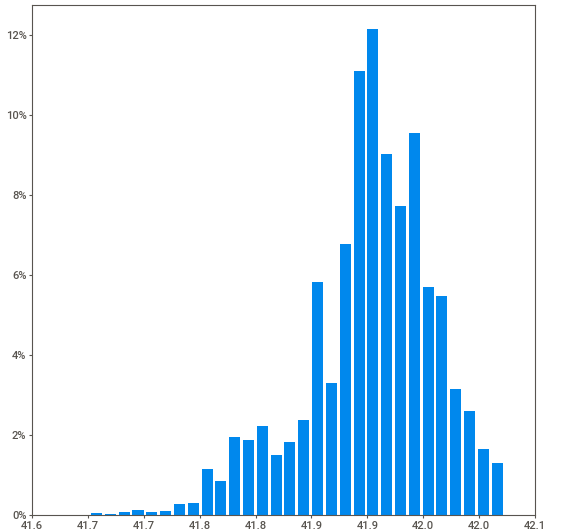
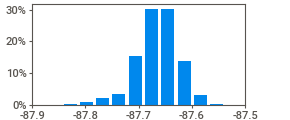
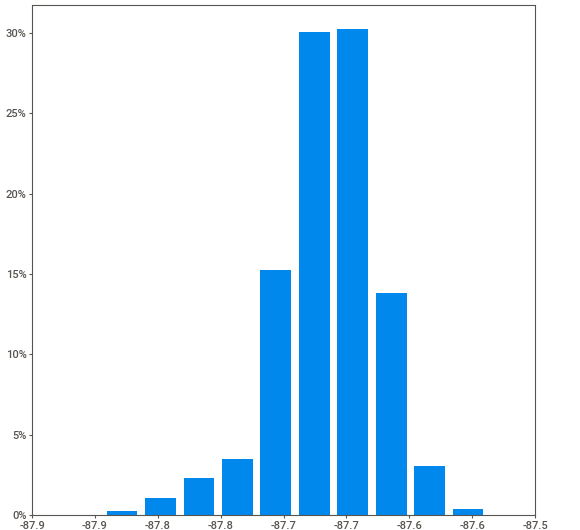
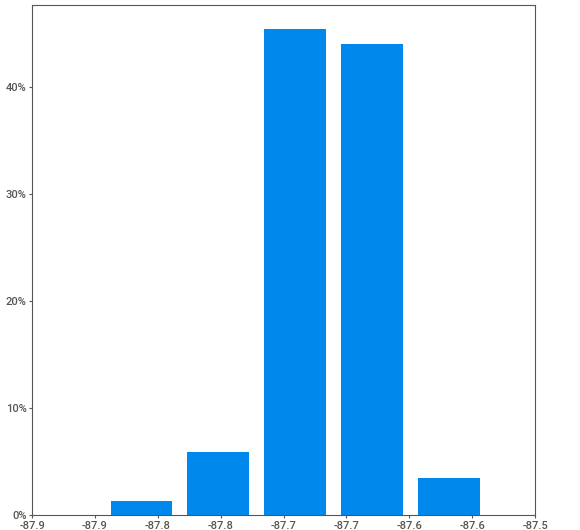
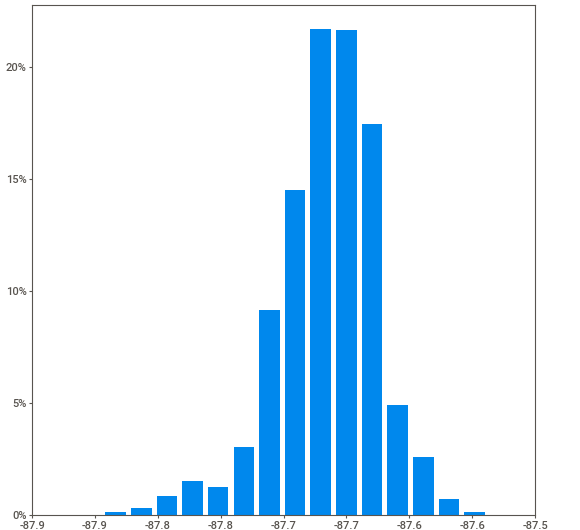
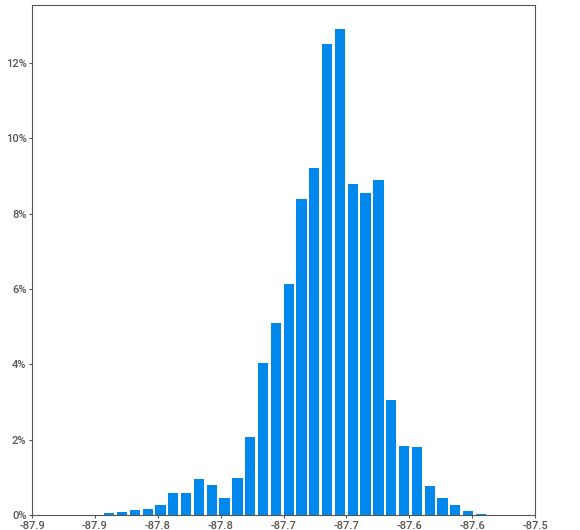
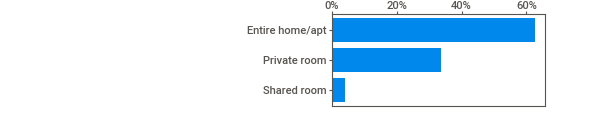
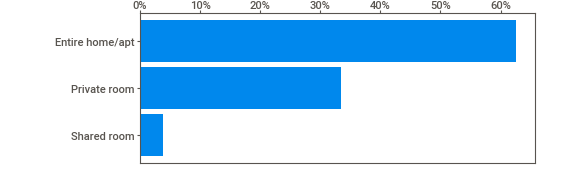
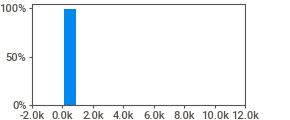
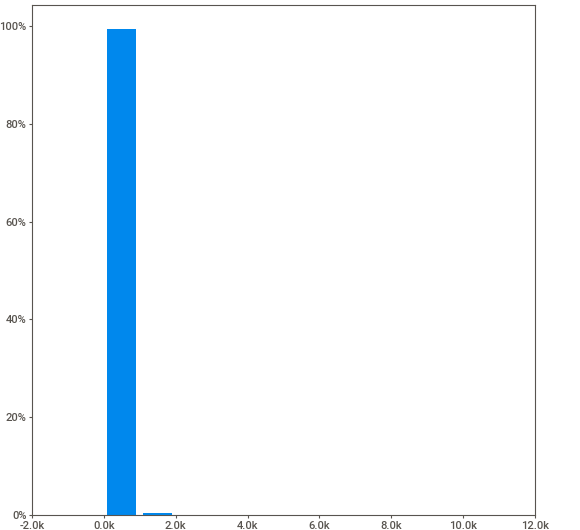
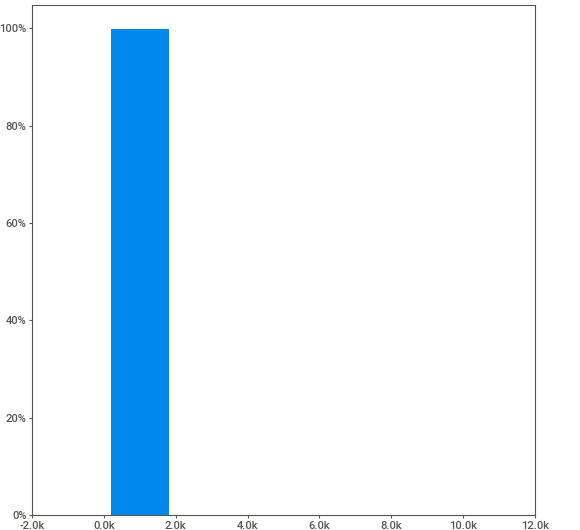
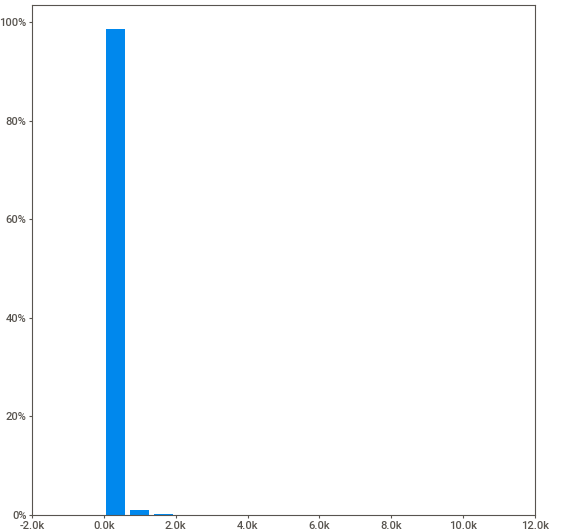
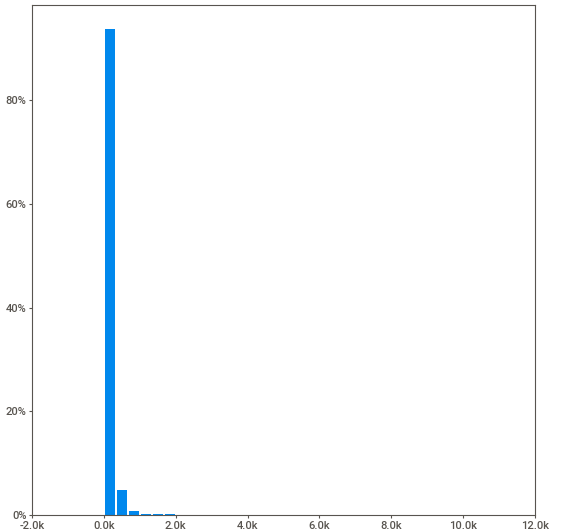
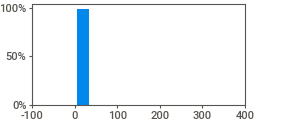
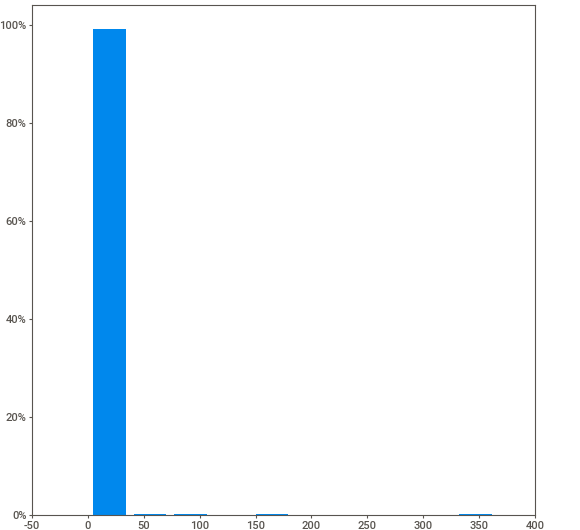
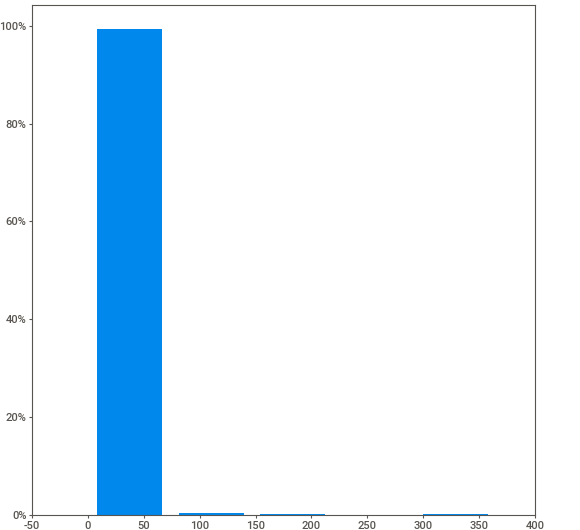
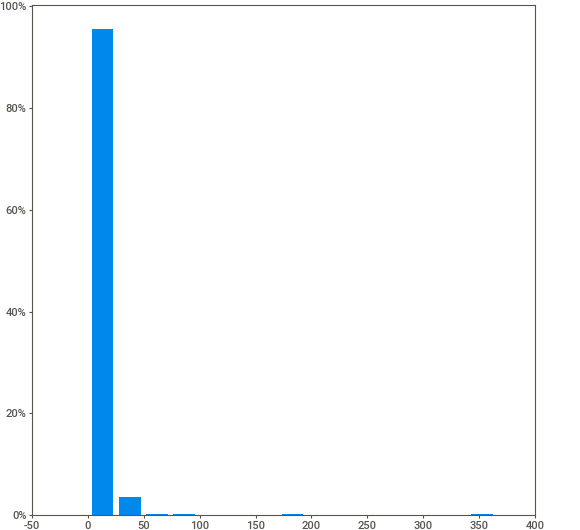
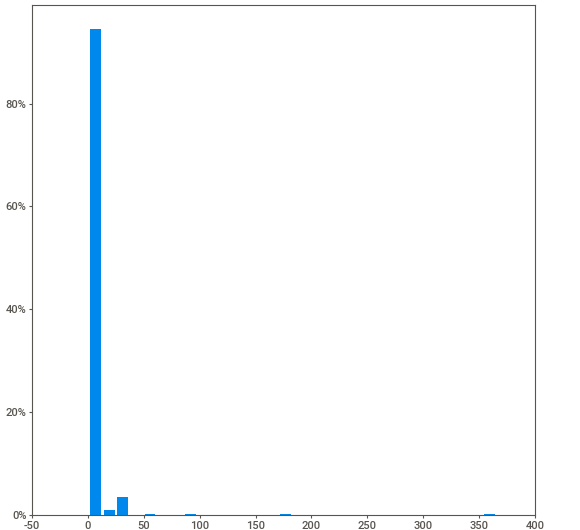
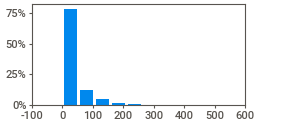
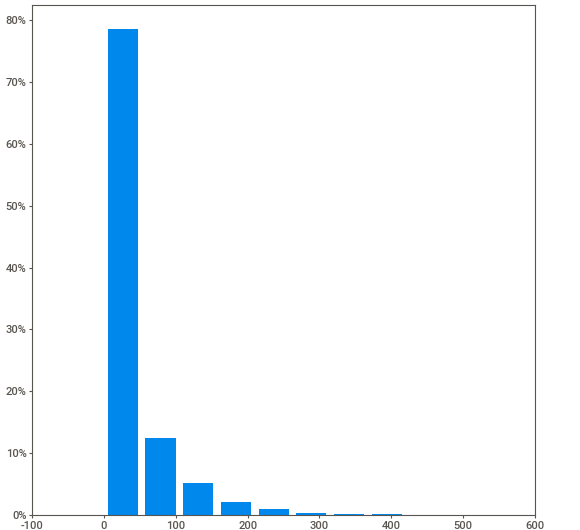
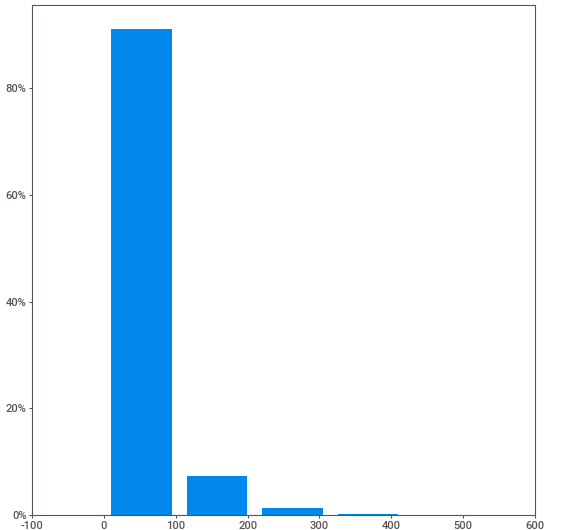
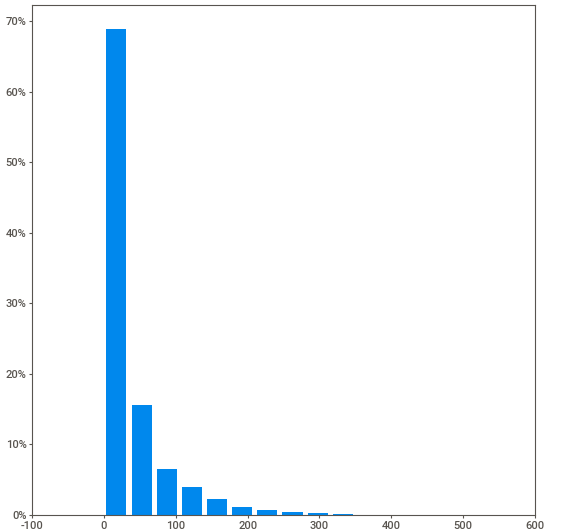
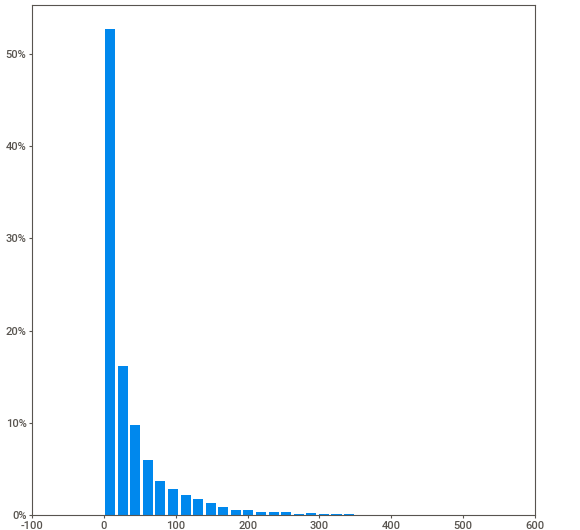
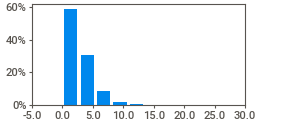
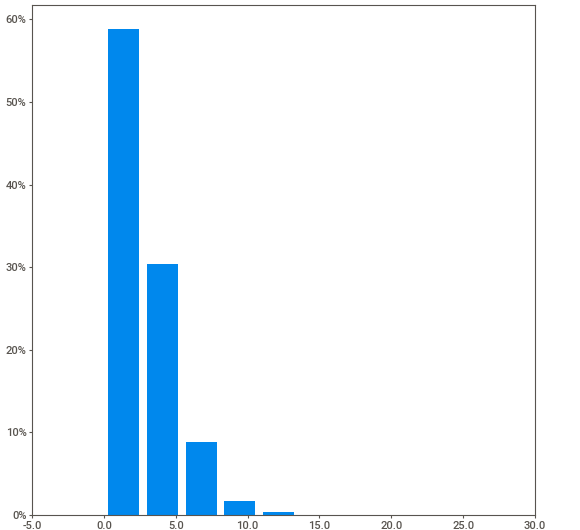
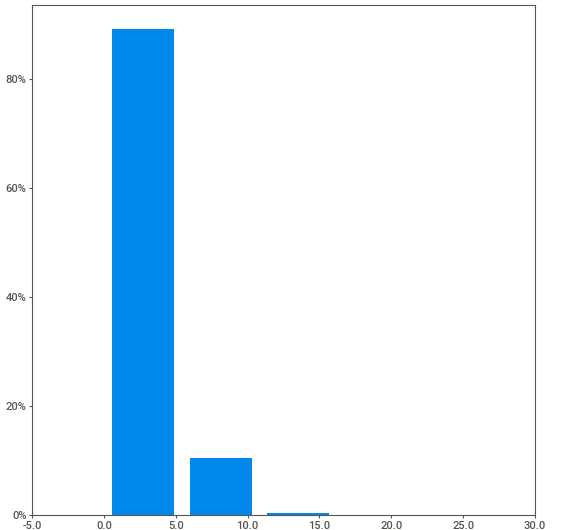
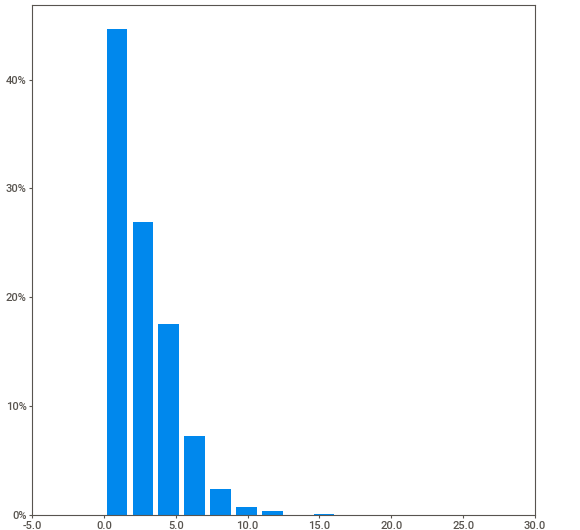
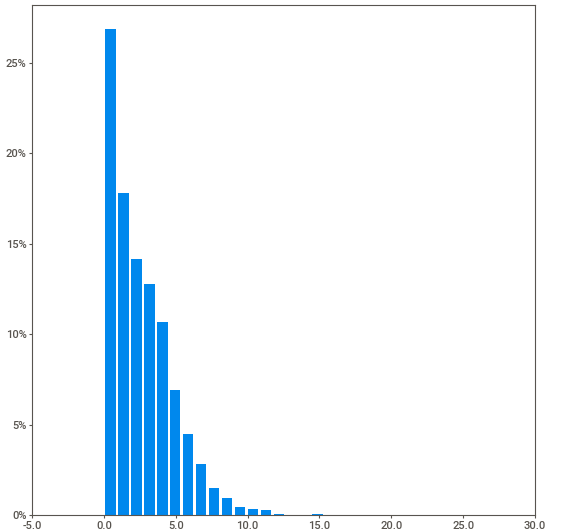
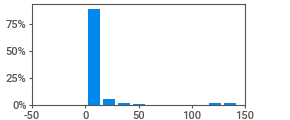
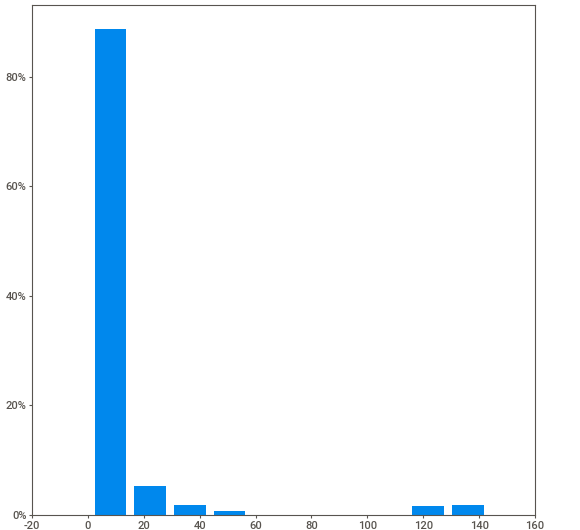
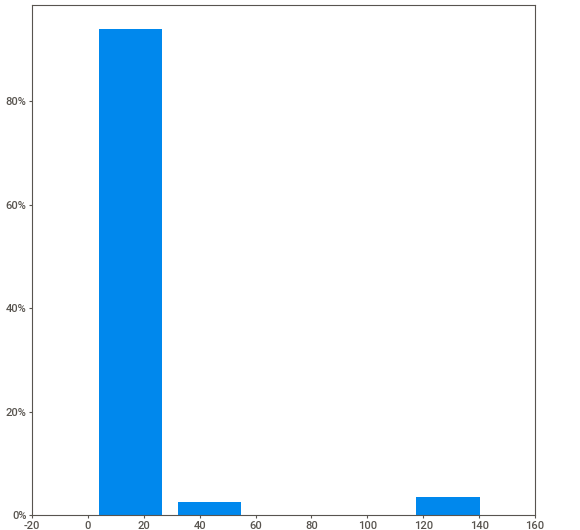
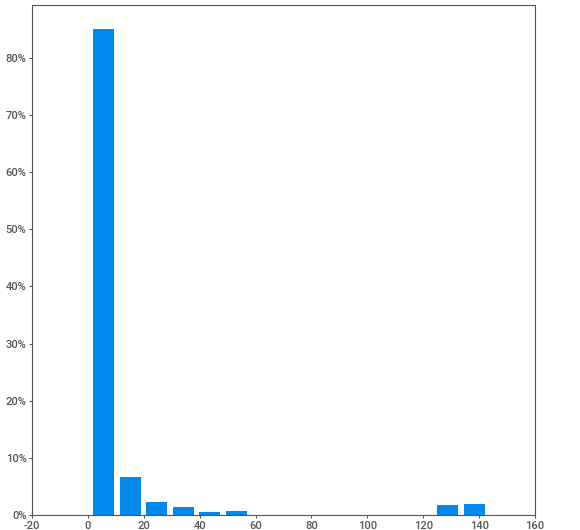
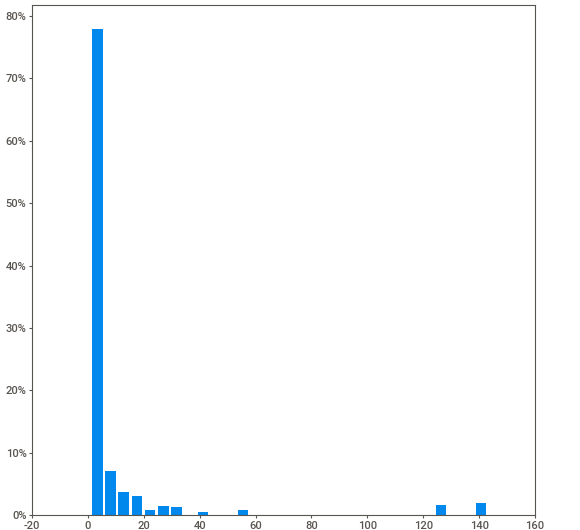
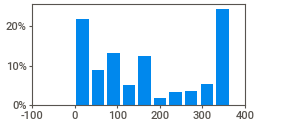
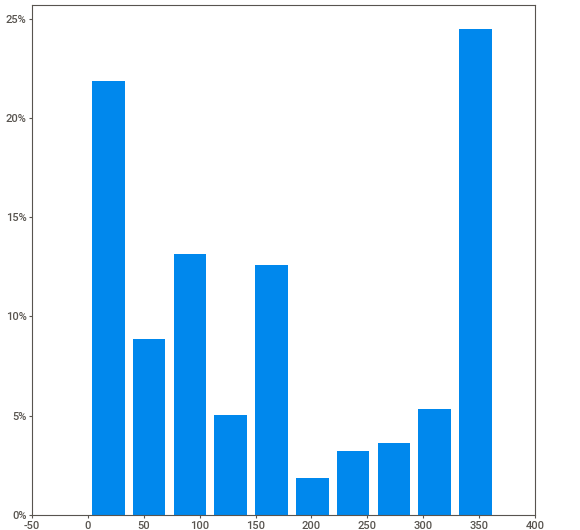
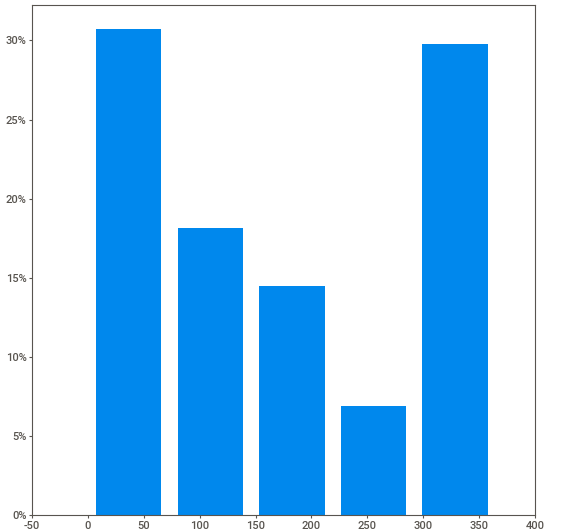
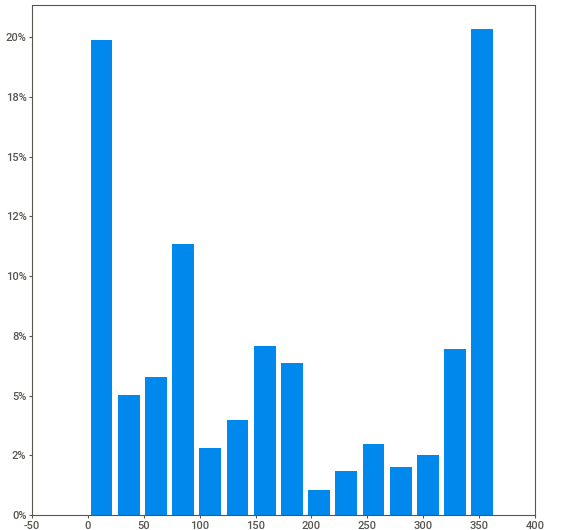
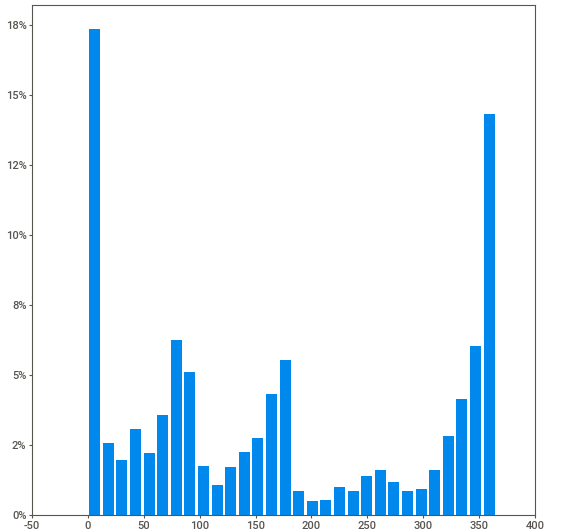
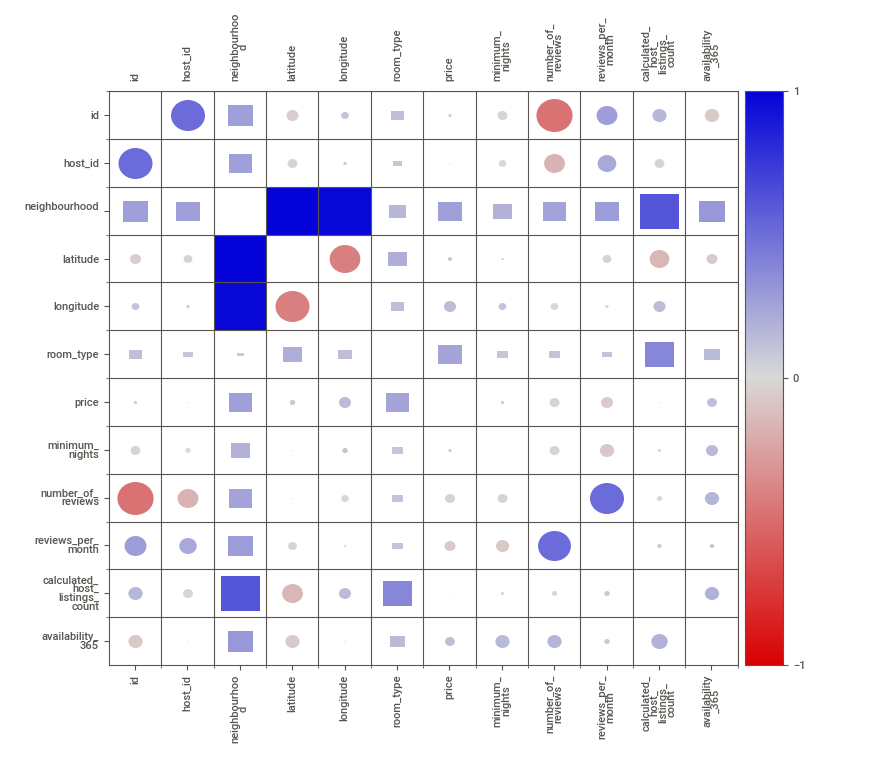
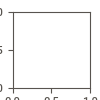

In [40]:
advert_report.show_notebook()